#### **6 Adımda PYTHON ile Makine Öğrenmesini Uygulama**

**1. Adım: Veri Seti Yükleme**

Makine öğrenmesi uygulamalarının ilk adımı, veri setini yüklemek ve incelemektir. Bu adımda, Iris veri setini yükleyip veri çerçevesi (DataFrame) olarak inceleyeceğiz.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Iris veri setini yükleme
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Veri setini inceleyelim
print(df.head())
print(df.describe())
print(df['target'].value_counts())

- load_iris() fonksiyonu ile Iris veri setini yüklüyoruz.
- Veriyi bir Pandas DataFrame'e dönüştürüyoruz.
- İlk birkaç satırı görmek için head() fonksiyonunu kullanıyoruz.
- Veri setinin özet istatistiklerini describe() ile inceliyoruz.
- Hedef değişkenin sınıf dağılımını value_counts() ile kontrol ediyoruz.

**2. Adım: Veriyi Öğrenme ve Test Olarak Bölme**

Veri setini eğitim ve test setlerine bölmek, modelin performansını değerlendirmek için önemlidir. Eğitim seti modeli eğitmek için, test seti ise modeli değerlendirmek için kullanılır.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[iris.feature_names]  # Özellikler
y = df['target']            # Hedef değişken

# Veriyi %70 eğitim ve %30 test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol etme
print(f"Eğitim seti boyutu: {X_train.shape[0]}")
print(f"Test seti boyutu: {X_test.shape[0]}")

- Özellikleri (X) ve hedef değişkeni (y) belirliyoruz.
- train_test_split fonksiyonu ile veriyi eğitim ve test setlerine ayırıyoruz (%70 eğitim, %30 test).
- Eğitim ve test setlerinin boyutlarını kontrol ediyoruz.

**3. Adım: Uygun Modeli Belirleme**

Makine öğrenmesi modelleri farklı algoritmalar kullanarak çalışır. Bu adımda birkaç yaygın modeli tanımlayacağız.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Modelleri tanımlama
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC()
}

# Modellerin boş tanımları
for name, model in models.items():
    print(f"{name}: {model}")

- K-Nearest Neighbors (KNN), Lojistik Regresyon ve Destek Vektör Makineleri (SVM) modellerini tanımlıyoruz.
- Her modelin boş tanımlarını ekrana yazdırıyoruz.

**4. Adım: Seçilen Modellere Göre Öğrenme**

Bu adımda, tanımladığımız modelleri eğitim verisi ile eğitiyoruz.

In [ ]:
# Modelleri eğitme
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} modeli eğitildi.")

- Tanımladığımız her modeli eğitim verisi ile eğitiyoruz.
- Her modelin eğitildiğine dair bir bilgi mesajı yazdırıyoruz.

**5. Adım: Tahmin Yapma**

Eğitilen modellerle test verisi üzerinde tahminler yapacağız.

In [ ]:
# Her modelle tahmin yapma ve doğruluğu hesaplama
predictions = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    print(f"{name} Model Tahminleri: {y_pred[:5]}")  # İlk 5 tahmini gösteriyoruz

- Her modelle test verisi üzerinde tahminler yapıyoruz.
- Tahminleri bir sözlükte saklıyoruz ve ilk 5 tahmini ekrana yazdırıyoruz.

**6. Adım: Doğruluğu Kontrol Etme**

Modelin doğruluğunu ölçmek, modelin performansını değerlendirmenin önemli bir yoludur.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Doğruluk skorlarını hesaplama ve görselleştirme
accuracies = {}
for name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Model Doğruluğu: {accuracy * 100:.2f}%")

# Doğrulukları görselleştirme
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Doğruluk Karşılaştırması')
plt.xlabel('Modeller')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)
plt.show()

# En iyi modeli seçme
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print(f"En iyi model: {best_model_name} ile {accuracies[best_model_name] * 100:.2f}% doğruluk")

# En iyi model için karışıklık matrisi görselleştirme
y_pred_best = predictions[best_model_name]
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f'{best_model_name} Modeli için Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

- Her modelin doğruluk skorunu hesaplıyoruz.
- Doğruluk skorlarını bir bar grafikte görselleştiriyoruz.
- En iyi modelin adını ve doğruluğunu yazdırıyoruz.
- En iyi modelin performansını analiz etmek için karışıklık matrisi (confusion matrix) görselleştiriyoruz.

**TÜM ADIMLARI BİR ARAYA GETİREN ÖRNEK PYTHON KODU**

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

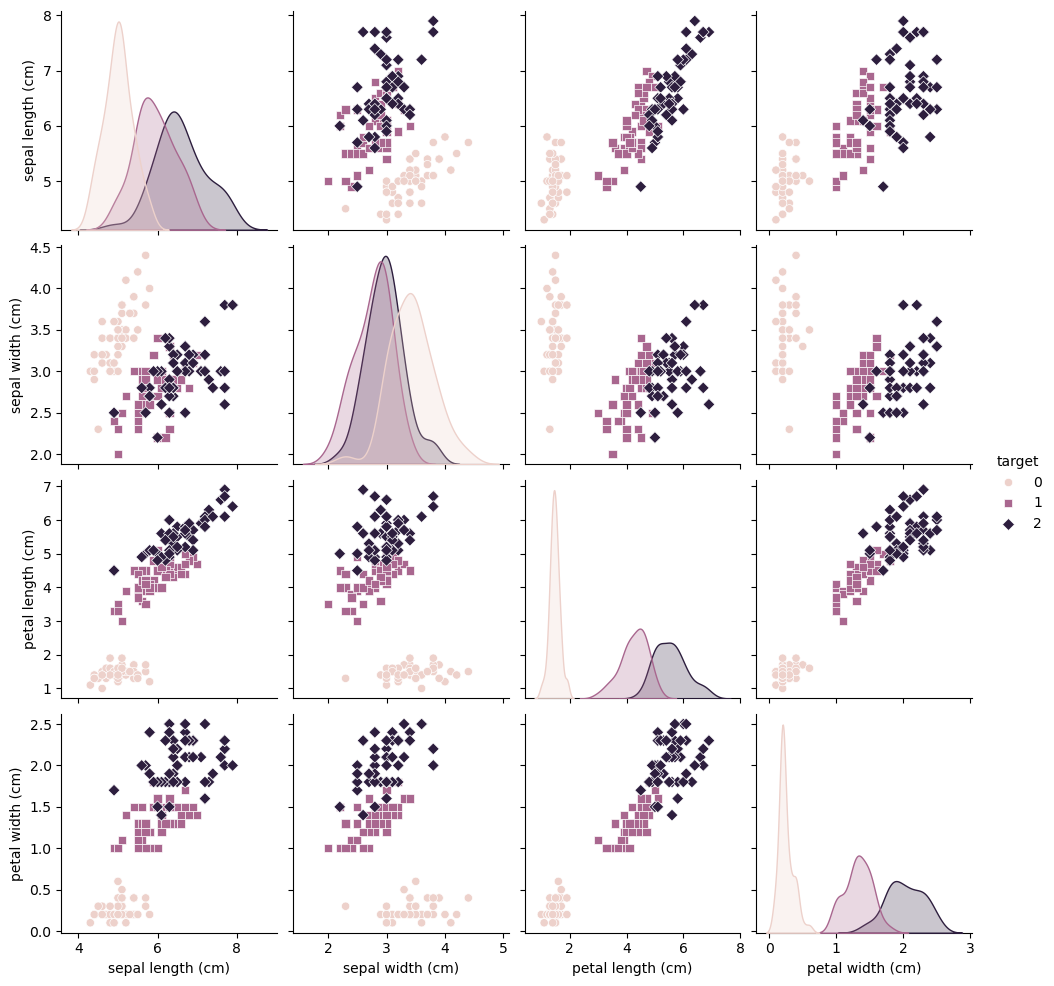

Eğitim seti boyutu: 105
Test seti boyutu: 45

KNN: KNeighborsClassifier(n_neighbors=3)
Logistic Regression: LogisticRegression(max_iter=200)
SVM: SVC()


KNN modeli eğitildi.
Logistic Regression modeli eğitildi.
SVM modeli eğitildi.


KNN Model Tahminleri: [1 0 2 1 1]
Logistic Regression Model Tahminleri: [1 0 2 1 1]
SVM Model Tahminleri: [1 0 2 1 1]


KNN Model Doğruluğu: 100.00%
Logistic Regression Model Doğruluğu: 100.00%
SVM Model Doğruluğu: 100.00%




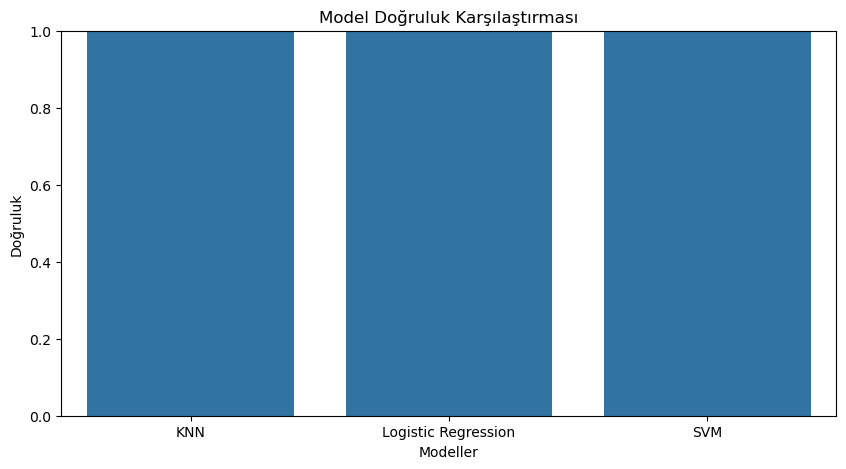

En iyi model: KNN ile 100.00% doğruluk


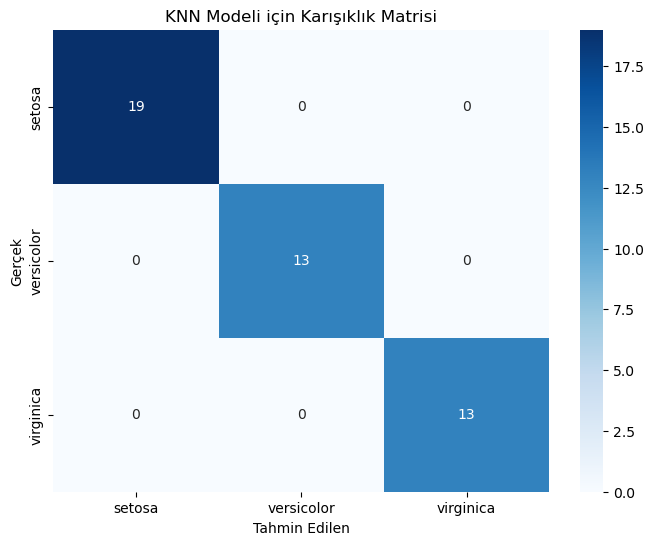

In [4]:
## 1. Adım: Veri Seti Yükleme ve İnceleme
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# Iris veri setini yükleme
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Veri setini inceleyelim
print(df.head())
print(df.describe())
print(df['target'].value_counts())

# Veriyi görselleştirme
sns.pairplot(df, hue='target', markers=["o", "s", "D"])
plt.show()

## 2. Adım: Veriyi Öğrenme ve Test Olarak Bölme
from sklearn.model_selection import train_test_split

X = df[iris.feature_names]  # Özellikler
y = df['target']            # Hedef değişken

# Veriyi %70 eğitim ve %30 test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol etme
print(f"Eğitim seti boyutu: {X_train.shape[0]}")
print(f"Test seti boyutu: {X_test.shape[0]}\n")

## 3. Adım: Uygun Modeli Belirleme
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Modelleri tanımlama
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC()
}

# Modellerin boş tanımları
for name, model in models.items():
    print(f"{name}: {model}")
print("\n")

## 4. Adım: Seçilen Modele Göre Öğrenme
# Modelleri eğitme
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} modeli eğitildi.")
print("\n")

## 5. Adım: Tahmin Yapma
# Her modelle tahmin yapma ve doğruluğu hesaplama
predictions = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    print(f"{name} Model Tahminleri: {y_pred[:5]}")  # İlk 5 tahmini gösteriyoruz
print("\n")

## 6. Adım: Doğruluğu Kontrol Etme
from sklearn.metrics import accuracy_score, confusion_matrix

# Doğruluk skorlarını hesaplama ve görselleştirme
accuracies = {}
for name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Model Doğruluğu: {accuracy * 100:.2f}%")
print("\n")

# Doğrulukları görselleştirme
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Doğruluk Karşılaştırması')
plt.xlabel('Modeller')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)
plt.show()

# En iyi modeli seçme
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print(f"En iyi model: {best_model_name} ile {accuracies[best_model_name] * 100:.2f}% doğruluk")

# En iyi model için karışıklık matrisi görselleştirme
y_pred_best = predictions[best_model_name]
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f'{best_model_name} Modeli için Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

**NOT :** Veri seti çok basit olduğu için tüm modellerde 100% doğruluk elde edildi. Bu adımlar daha karmaşık bir veri seti üzerinde uygulansaydı daha farklı sonuçlar elde edilebilirdi.

**ÖZET**


Bu proje, Iris veri seti kullanılarak makine öğrenmesi modellerinin nasıl uygulanacağını adım adım göstermektedir.

İlk olarak, veri seti yüklendi ve veri setinin temel istatistikleri ve dağılımları incelendi. Veri seti eğitim ve test setlerine bölündü (%70 eğitim, %30 test).
 
Üç farklı makine öğrenmesi modeli (K-Nearest Neighbors, Lojistik Regresyon, Destek Vektör Makineleri) tanımlandı ve her biri eğitim seti kullanılarak eğitildi. 

Eğitilen modellerle test seti üzerinde tahminler yapıldı.

Modellerin performansları doğruluk oranları ile değerlendirildi ve karşılaştırıldı.

En iyi modelin karışıklık matrisi görselleştirildi ve tüm modellerin doğruluk oranları gösterildi.

Bu adımlar, bir makine öğrenmesi projesinin temel aşamalarını kapsayarak veri yükleme, inceleme, model eğitimi ve performans değerlendirmesini anlatmaktadır.